<div class="alert alert-block" style="font-size:20px; font-family:verdana; line-height:1.7em; border-radius:20px; padding:2em; background-color:#212021; border-color:white; color: #c4c2c4">
  <img src="https://www.investopedia.com/thmb/r0G8dCJxoUV5rsaTEuR8mUUymdI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/terms_i_insurance_FINAL_-3556393b3bbf483e9bc8ad9b707641e4.jpg" style="float: right; margin-left: 20px; width: 300px;">
  Insurance is an essential financial service that provides protection against unforeseen risks, offering peace of mind to individuals and businesses. One of the central challenges in the insurance industry is determining the Premium Amount—the cost charged to customers in exchange for coverage. Setting the right premium requires a careful balance: it should reflect the risk associated with the insured entity while remaining competitive and fair.
  </br></br>
  The prediction of the Premium Amount is influenced by numerous factors, such as customer demographics, claim histories, and the specific attributes of the insured item (e.g., vehicle type, property details). This problem is inherently complex due to the interactions between these features and the need to minimize both underpricing (leading to losses for the insurer) and overpricing (causing customers to look elsewhere).
  </br></br>
  In this notebook, we will analyze the dataset to uncover patterns and relationships that drive premium calculations. Through this exploration, we aim to develop a deeper understanding of the variables at play, identify key drivers of the Premium Amount, and set the stage for building predictive models that can assist in accurate pricing strategies.
  </br></br>
  Let’s delve into the data and tackle this fascinating insurance problem!
</div>


<div class="alert alert-block" style="font-size:20px; font-family:verdana; line-height:1.7em; border-radius:20px; padding:2em; background-color:#212021; border-color:white; color: #c4c2c4;">
Here’s a brief feature description list for both the <strong>Train</strong> and the <strong>Test</strong> datasets combined:</br>




<ol>
<li><strong>Gender</strong>: Participant's gender.</li>
<li><strong>Age</strong>: Participant's age, ranging from 18 to 64, with a mean of 41, allowing age-based insights.</li>
<li><strong>Annual Income</strong>: Yearly income ranging from 1 to 149,997, with a mean of 32,768.</li>
<li><strong>Marital Status</strong>: Represents participants' marital status, categorized as <strong>Single</strong>, <strong>Married</strong>, or <strong>Divorced</strong>.</li>
<li><strong>Number of Dependents</strong>: Refers to individuals financially supported by the participant, ranging from 0 to 4, with a mean of 2.</li>
<li><strong>Education Level</strong>: Represents participants' highest level of education, including <strong>Master's</strong>, <strong>PhD</strong>, <strong>Bachelor's</strong>, and <strong>High School</strong>.</li>
<li><strong>Occupation</strong>: Represents the participant's employment status, including <strong>Employed</strong>, <strong>Self-Employed</strong>, and <strong>Unemployed</strong>.</li>
<li><strong>Health Score</strong>: Represents the participant's health rating, ranging from 1 to 58, with a mean of 24.</li>
<li><strong>Location</strong>: Represents the participant's living area, categorized as <strong>Suburban</strong>, <strong>Rural</strong>, or <strong>Urban</strong>.</li>
<li><strong>Policy Type</strong>: Represents the type of insurance policy, categorized as <strong>Premium</strong>, <strong>Comprehensive</strong>, or <strong>Basic</strong>.</li>
<li><strong>Policy Start Date</strong>: Represents the date the participant's policy started, ranging from 2019 to 2024, with a mean of 2021.</li>
<li><strong>Previous Claims</strong>: Represents the number of previous claims made by the participant, ranging from 0 to 9, with a mean of 1.</li>
<li><strong>Vehicle Age</strong>: Represents the age of the participant's vehicle, ranging from 0 to 19 years, with a mean of 9.</li>
<li><strong>Credit Score</strong>: Represents the participant's credit score, ranging from 300 to 849, with a mean of 592.</li>
<li><strong>Insurance Duration</strong>: Represents the duration of the insurance policy, ranging from 1 to 9 years, with a mean of 5.</li>
<li><strong>Customer Feedback</strong>: Represents the participant's feedback on the service, categorized as <strong>Poor</strong>, <strong>Average</strong>, or <strong>Good</strong>.</li>
<li><strong>Smoking Status</strong>: Represents whether the participant smokes, categorized as <strong>Yes</strong> or <strong>No</strong>.</li>
<li><strong>Exercise Frequency</strong>: Represents how often the participant exercises, categorized as <strong>Rarely</strong>, <strong>Daily</strong>, <strong>Weekly</strong>, or <strong>Montlhy</strong>.</li>
<li><strong>Property Type</strong>: Represents the type of property the participant resides in, categorized as <strong>House</strong>, <strong>Condo</strong>, or <strong>Apartment</strong>.</li>
</ol>
<!-- <strong>Target Variable</strong></br> -->

<ul>
<li><strong>Premium Amount</strong>: Represents the insurance premium amount for the participant, ranging from 20 to 4,999, based on various factors.</li>
</ul>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML
import warnings
from colorama import Fore, Style



In [2]:
df=pd.read_csv('Insurance Premium Prediction Dataset.csv')
df.head()


,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [3]:
# Helper functions defined at module level
def generate_insights_html(insights):
    if not insights:
        return "<div class='insight-card'>No significant insights found.</div>"
    return "\n".join([f"<div class='insight-card'>{insight}</div>" for insight in insights])

def generate_dtype_distribution(df):
    dtype_counts = df.dtypes.value_counts()
    total_cols = len(df.columns)
    
    html = "<div class='dtype-distribution'>"
    for dtype, count in dtype_counts.items():
        percentage = (count / total_cols) * 100
        html += f"""
            <div class='dtype-item'>
                <div class='dtype-label'>{dtype} ({count} columns)</div>
                <div class='progress-bar'>
                    <div class='progress-fill' style='width: {percentage}%'></div>
                </div>
            </div>
        """
    html += "</div>"
    return html

def generate_column_details(df):
    html = "<div class='column-grid'>"
    for column in df.columns:
        missing = df[column].isnull().sum()
        missing_pct = (missing / len(df)) * 100
        unique_values = df[column].nunique()
        
        html += f"""
            <div class='column-card'>
                <div class='column-name'>{column}</div>
                <div class='column-type'>{df[column].dtype}</div>
                <div class='column-stats'>
                    <div>Unique values: {unique_values}</div>
                    <div>Missing: {missing} ({missing_pct:.1f}%)</div>
                </div>
            </div>
        """
    html += "</div>"
    return html

def generate_missing_values_analysis(df):
    missing = df.isnull().sum()
    if missing.sum() == 0:
        return "<div class='info-message'>No missing values found in the dataset.</div>"
    
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing[missing > 0],
        'Percentage': missing_pct[missing > 0]
    }).round(2)
    
    return missing_df.to_html(classes='table')

def generate_statistical_summary(df):
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        return "<div class='info-message'>No numeric columns found for statistical analysis.</div>"
    
    return df.describe().round(2).to_html(classes='table')

def get_data_insights(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    insights = []
    
    if len(numeric_cols) > 0:
        # Get highest and lowest correlations
        if len(numeric_cols) > 1:
            corr_matrix = df[numeric_cols].corr()
            np.fill_diagonal(corr_matrix.values, np.nan)
            max_corr = corr_matrix.max().max()
            max_corr_cols = np.where(corr_matrix == max_corr)
            if len(max_corr_cols[0]) > 0:
                col1, col2 = numeric_cols[max_corr_cols[0][0]], numeric_cols[max_corr_cols[1][0]]
                insights.append(f"Highest correlation: {col1} and {col2} ({max_corr:.2f})")

    # Check for skewness in numeric columns
    for col in numeric_cols:
        skew = df[col].skew()
        if abs(skew) > 1:
            insights.append(f"High skewness detected in {col} ({skew:.2f})")

    # Check for constant columns
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    if constant_cols:
        insights.append(f"Constant columns detected: {', '.join(constant_cols)}")

    return insights

def get_dashboard_styles(theme_colors):
    """Return the CSS styles for the dashboard"""
    return f"""
        @import url('https://fonts.googleapis.com/css2?family=Inter:wght@400;600&display=swap');
        
        * {{
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }}
        
        .dashboard-container {{
            font-family: 'Inter', sans-serif;
            max-width: 1200px;
            margin: 20px auto;
            padding: 20px;
            background: {theme_colors['bg']};
            color: {theme_colors['text']};
            border-radius: 20px;
        }}
        
        .section {{
            background: {theme_colors['card_bg']};
            border-radius: 15px;
            margin: 20px 0;
            padding: 20px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            transition: transform 0.3s ease;
        }}
        
        .section:hover {{
            transform: translateY(-5px);
        }}
        
        .section-header {{
            background: {theme_colors['gradient']};
            color: white;
            padding: 15px 25px;
            border-radius: 10px;
            font-size: 1.2rem;
            font-weight: 600;
            margin-bottom: 20px;
        }}
        
        .stat-grid {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 20px;
        }}
        
        .stat-card {{
            padding: 20px;
            background: {theme_colors['card_bg']};
            border-radius: 10px;
            border: 1px solid {theme_colors['border']};
        }}
        
        .stat-value {{
            font-size: 1.5rem;
            font-weight: 600;
            color: {theme_colors['accent']};
            margin-top: 5px;
        }}
        
        .table {{
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            font-size: 0.9rem;
        }}
        
        .table th, .table td {{
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid {theme_colors['border']};
        }}
        
        .table th {{
            background: {theme_colors['hover_bg']};
            font-weight: 600;
        }}
        
        .insights-container {{
            display: grid;
            gap: 15px;
            padding: 10px;
        }}
        
        .insight-card {{
            padding: 15px;
            background: {theme_colors['card_bg']};
            border-radius: 8px;
            border-left: 4px solid {theme_colors['accent']};
        }}
        
        .progress-bar {{
            height: 8px;
            background: {theme_colors['border']};
            border-radius: 4px;
            overflow: hidden;
            margin: 8px 0;
        }}
        
        .progress-fill {{
            height: 100%;
            background: {theme_colors['gradient']};
            transition: width 1s ease-out;
        }}
        
        .column-grid {{
            display: grid;
            grid-template-columns: repeat(auto-fill, minmax(250px, 1fr));
            gap: 20px;
            margin-top: 15px;
        }}
        
        .column-card {{
            background: {theme_colors['card_bg']};
            border: 1px solid {theme_colors['border']};
            border-radius: 8px;
            padding: 15px;
        }}
        
        .column-name {{
            font-weight: 600;
            color: {theme_colors['accent']};
            margin-bottom: 5px;
        }}
        
        .column-type {{
            font-size: 0.9rem;
            color: {theme_colors['text']};
            opacity: 0.8;
            margin-bottom: 10px;
        }}
        
        .column-stats {{
            font-size: 0.9rem;
        }}
        
        .dtype-distribution {{
            display: grid;
            gap: 15px;
        }}
        
        .dtype-item {{
            margin-bottom: 10px;
        }}
        
        .dtype-label {{
            margin-bottom: 5px;
            font-size: 0.9rem;
        }}
        
        .info-message {{
            padding: 15px;
            background: {theme_colors['card_bg']};
            border-radius: 8px;
            border: 1px solid {theme_colors['border']};
        }}
    """

def create_styled_dashboard(df, n_top=5, theme='light'):
    """
    Create a beautifully styled dashboard for DataFrame analysis with modern aesthetics and animations.
    
    Args:
        df (pandas.DataFrame): Input DataFrame to analyze
        n_top (int): Number of top rows to display (default=5)
        theme (str): 'light' or 'dark' theme (default='light')
    """
    import pandas as pd
    import numpy as np
    from IPython.display import HTML
    
    # Theme colors
    colors = {
        'light': {
            'bg': 'white',
            'text': '#1a1a1a',
            'gradient': 'linear-gradient(135deg, #6366f1 0%, #4f46e5 100%)',
            'card_bg': '#f8fafc',
            'hover_bg': '#f1f5f9',
            'border': '#e2e8f0',
            'accent': '#4f46e5'
        },
        'dark': {
            'bg': '#1a1a1a',
            'text': '#ffffff',
            'gradient': 'linear-gradient(135deg, #818cf8 0%, #6366f1 100%)',
            'card_bg': '#2d2d2d',
            'hover_bg': '#363636',
            'border': '#404040',
            'accent': '#818cf8'
        }
    }
    
    theme_colors = colors[theme]
    
    # Calculate additional statistics
    total_missing = df.isnull().sum().sum()
    total_duplicates = df.duplicated().sum()
    data_quality_score = round((1 - (total_missing / (df.shape[0] * df.shape[1])) - 
                              (total_duplicates / df.shape[0])) * 100, 2)
    insights = get_data_insights(df)

    # Generate dashboard HTML
    dashboard = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <style>
            {get_dashboard_styles(theme_colors)}
        </style>
    </head>
    <body>
        <div class="dashboard-container">
            <!-- Overview Section -->
            <div class="section">
                <div class="section-header">
                    📊 DataFrame Overview
                </div>
                <div class="stat-grid">
                    <div class="stat-card">
                        <div class="stat-label">Total Rows</div>
                        <div class="stat-value">{df.shape[0]:,}</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-label">Total Columns</div>
                        <div class="stat-value">{df.shape[1]}</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-label">Memory Usage</div>
                        <div class="stat-value">{df.memory_usage().sum() / 1024 / 1024:.1f} MB</div>
                    </div>
                    <div class="stat-card tooltip" data-tooltip="Based on completeness and uniqueness">
                        <div class="stat-label">Data Quality Score</div>
                        <div class="stat-value">{data_quality_score}%</div>
                    </div>
                </div>
            </div>

            <!-- Insights Section -->
            <div class="section">
                <div class="section-header">
                    💡 Data Insights
                </div>
                <div class="insights-container">
                    {generate_insights_html(insights)}
                </div>
            </div>

            <!-- Data Types Distribution -->
            <div class="section">
                <div class="section-header">
                    📊 Data Types Distribution
                </div>
                {generate_dtype_distribution(df)}
            </div>

            <!-- Column Details -->
            <div class="section">
                <div class="section-header">
                    📋 Column Details
                </div>
                {generate_column_details(df)}
            </div>

            <!-- Sample Data -->
            <div class="section">
                <div class="section-header">
                    🔍 Sample Data
                </div>
                {df.head(n_top).to_html(classes='table', float_format=lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x)}
            </div>
            
            <!-- Missing Values Analysis -->
            <div class="section">
                <div class="section-header">
                    ⚠️ Missing Values Analysis
                </div>
                {generate_missing_values_analysis(df)}
            </div>

            <!-- Statistical Summary -->
            <div class="section">
                <div class="section-header">
                    📈 Statistical Summary
                </div>
                {generate_statistical_summary(df)}
            </div>
        </div>
    </body>
    </html>
    """
    
    return HTML(dashboard)
    

In [4]:


# For dark theme
dashboard = create_styled_dashboard(df, theme='dark')
display(dashboard)

In [5]:
#Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [6]:
df.isnull().sum()/len(df)*100


Age                      1.680055
Gender                   0.000000
Annual Income            5.004303
Marital Status           1.799828
Number of Dependents    10.000000
Education Level          0.000000
Occupation              29.150111
Health Score             3.800115
Location                 0.000000
Policy Type              0.000000
Previous Claims         29.150111
Vehicle Age              0.000000
Credit Score            10.000000
Insurance Duration       0.000000
Premium Amount           0.660188
Policy Start Date        0.000000
Customer Feedback        6.580004
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64

In [7]:
df.isnull().sum()/len(df)*100

Age                      1.680055
Gender                   0.000000
Annual Income            5.004303
Marital Status           1.799828
Number of Dependents    10.000000
Education Level          0.000000
Occupation              29.150111
Health Score             3.800115
Location                 0.000000
Policy Type              0.000000
Previous Claims         29.150111
Vehicle Age              0.000000
Credit Score            10.000000
Insurance Duration       0.000000
Premium Amount           0.660188
Policy Start Date        0.000000
Customer Feedback        6.580004
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64

In [8]:

# #visulaise the missing values percentage
# df.isnull().sum()/len(df)*100
# #visulaise the missing values with plot 
# fig,ax=plt.subplots(figsize=(10,10))
# sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


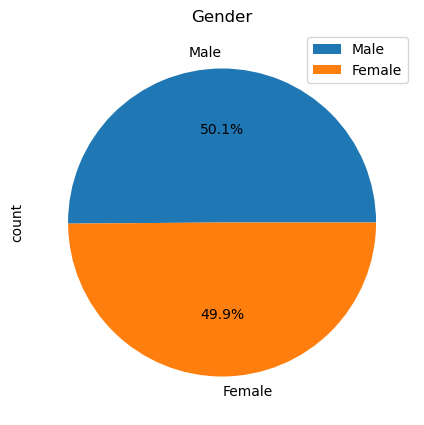

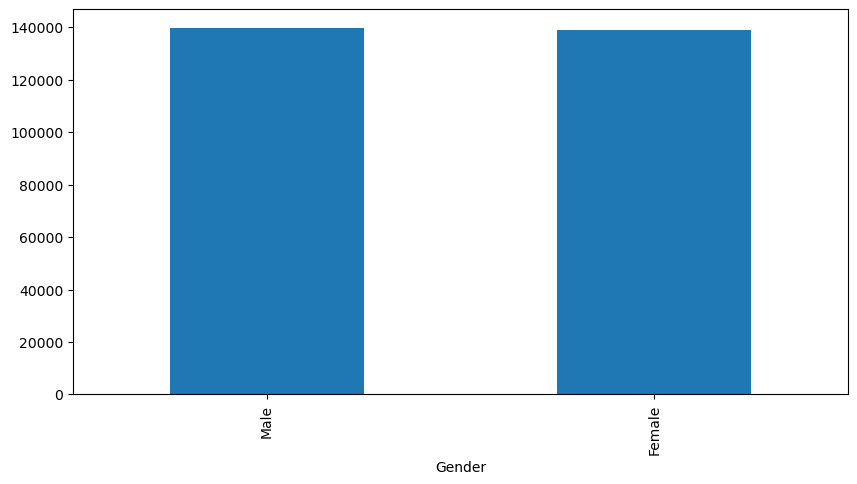

In [9]:
df['Gender'].value_counts()

#Pie chart for Gender 
plt.figure(figsize=(10,5))
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Gender')
plt.legend()

plt.show()

#Bar chart for Gender
plt.figure(figsize=(10,5))
df['Gender'].value_counts().plot(kind='bar')
plt.show()




In [10]:
# 1)Gender 
# pie/bar /box
# 2)Age 
# histogram /Distplot
# 3)Annual Income 
# histogram /Distplot
# kde (outliers and distribuition)
# 4)Martial status
# pie/bar/box
# 5)Number of dependies 
# pie/bar /
# 6)education level 
# pie/bar
# 7)occupation 
# pie/bar

# 8)health score
# kde/dist/hist

# 9)Loacation

# pie/bar


# 10)policy type

# pie bar 

# 11)policy start date 

# pie/bar 
#  12)Previous claims
# bar .pie. hist kde 

# 13)vehicle age 

# hist/kde/ 19-->Bar

# 14)Credit sCORE 

# hist/kde


# 15)insurance duration 

# pie/bar / hist can to o





# 16)customer feedback 

# bar/pie

# 17)smoking status 

# pie/bar

# 18)excersie frquency 

# bar/pie

# 19)property type 

# bar/pie


# 20)Premium amount -contnious

# kde.hist 




# ==================



# categriocal 
# numerail 



Cat_Col=['Gender','Marital Status','Occupation','Location','Policy Type','Customer Feedback','Smoking Status','Exercise Frequency','Previous Claims','Property Type','Policy Start Date']
Num_col=['Age','Annual Income','Number of Dependents','Health Score','Credit Score','Insurance Duration','Vehicle Age','Premium Amount']

#Now i wanted plot BAR AND PIE CHART FOR CATEGORICAL COLUMNS AND HISTOGRAM with KDE  FOR NUMERICAL COLUMNS
#AS I WANTED LIKE THAT AS FDOR CATGRIE SOLCUMN SIDE BY SIDE BAR AND PIE BIT WITH CUTMOSIATION LIEK % AND LENGENDS 
#TITLE FONT COLOUR DEFINE







In [11]:
%%capture
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 

In [12]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

NameError: name 'df_tr' is not defined

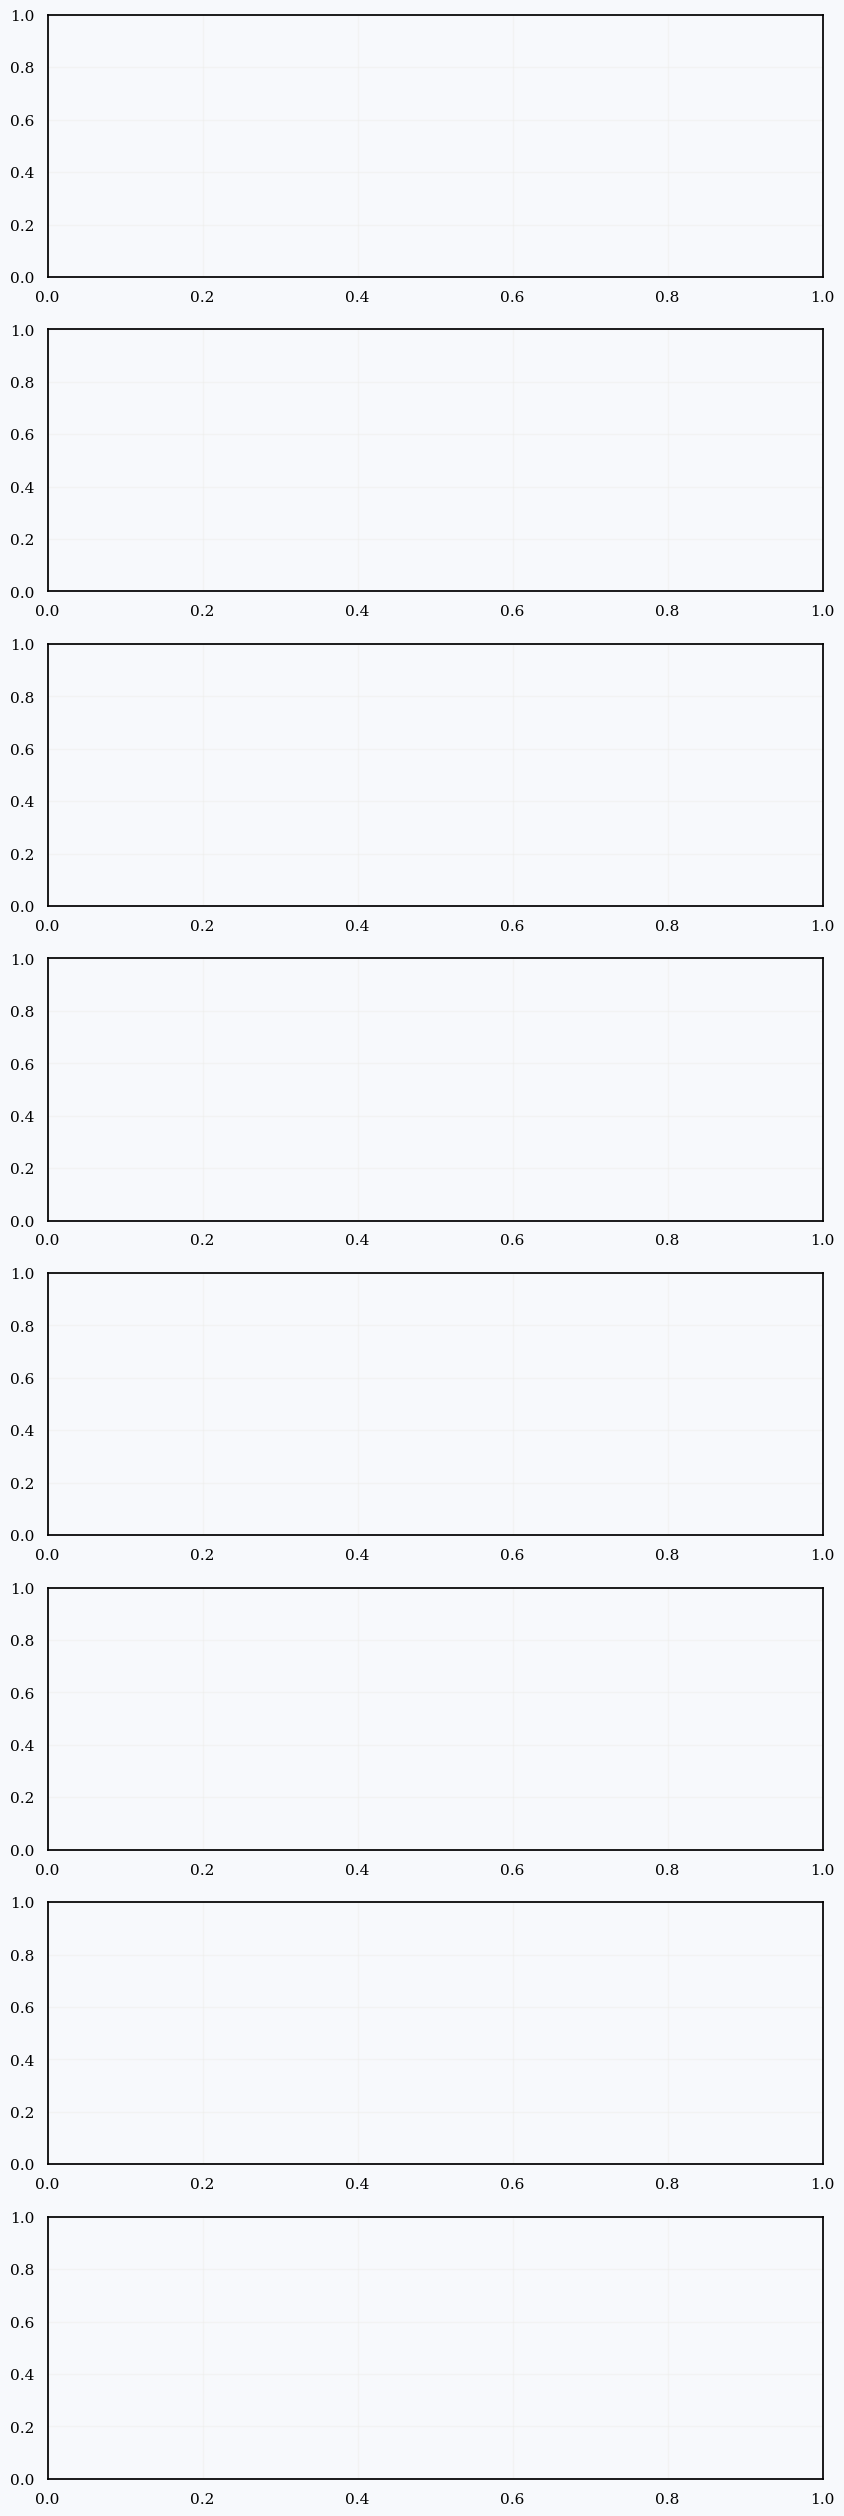

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
    

# Palette personnalisée
colors = ["#4caba4", "#d68c78", "#a3a2a2", "#ab90a0", "#e6daa3", "#6782a8", "#8ea677"]

# Création des sous-graphiques
fig, axes = plt.subplots(nrows=len(Num_col), ncols=1, figsize=(10, len(Num_col) * 4))

# Aplatir les axes au cas où il y aurait plusieurs colonnes
axes = axes.flatten()

# Tracer les histogrammes
for i, col in enumerate(Num_col):
    sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i % len(colors)])  # Appliquer les couleurs en boucle
    axes[i].set_title(f'{col} Distribution', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    sns.despine(ax=axes[i])  # Suppression des bordures inutiles pour un look propre

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


In [83]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors = ["#0d0f12", "#1f3a48", "#2e5a62", "#3c7d84", "#6c8e92", "#d4af7f", "#f5c36f"]





    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)
    
    # Count Plot
    sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


C:\Users\RC\AppData\Local\Temp\ipykernel_4112\956258481.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\956258481.py:24: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


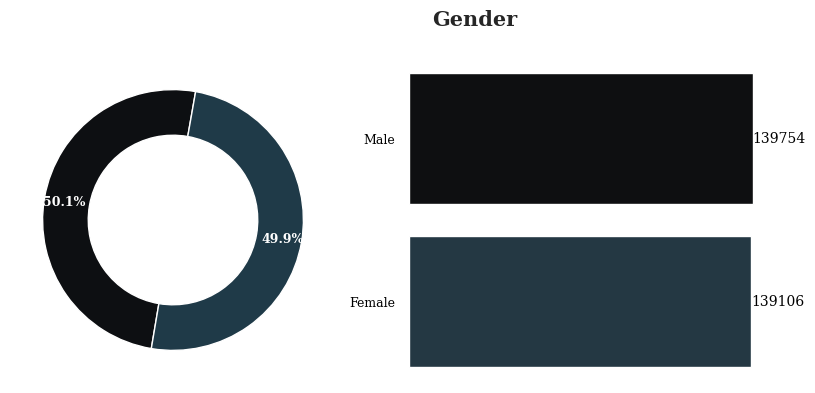

In [84]:
showplot("Gender")

<div style="border-radius:10px; padding: 12px; background-color: black; font-size:140%; text-align:left">
✩ <b>Our Data</b> Gender Distribuition <b>is 49.9% is feemale and 50.1% male</b>


C:\Users\RC\AppData\Local\Temp\ipykernel_4112\2579746610.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\2579746610.py:23: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


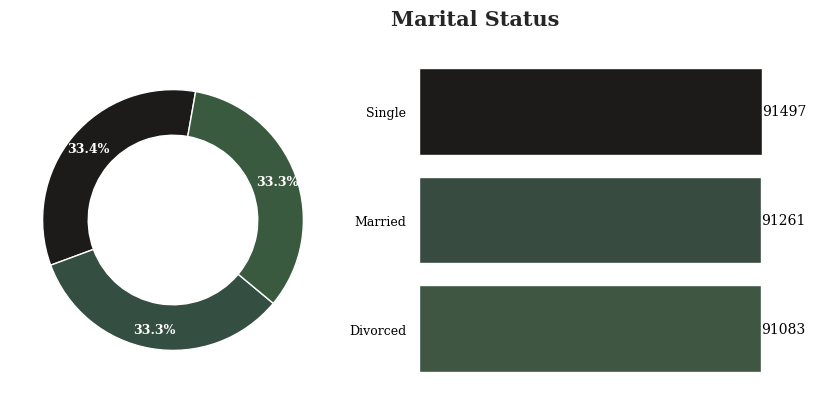

In [80]:
showplot("Marital Status")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\956258481.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\956258481.py:24: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


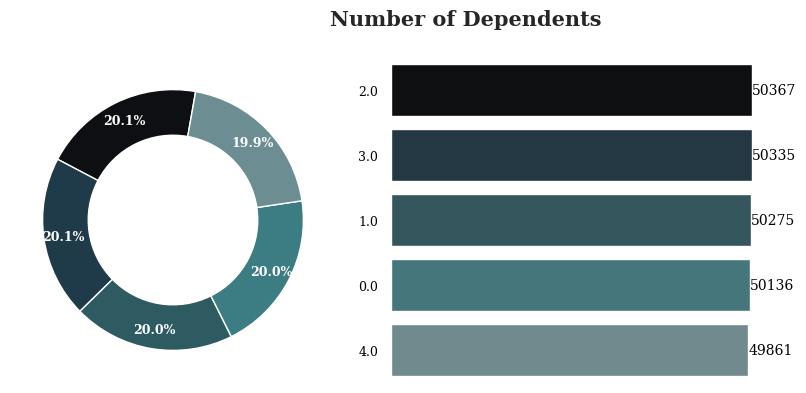

In [85]:
showplot("Number of Dependents")

In [18]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Premium Amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


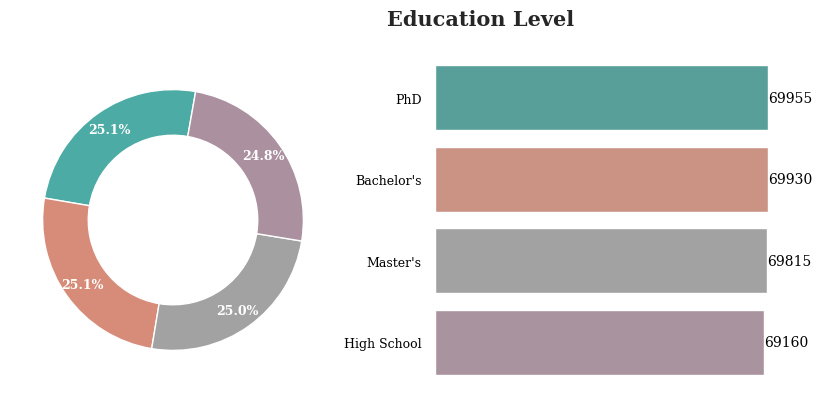

In [19]:
showplot("Education Level")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


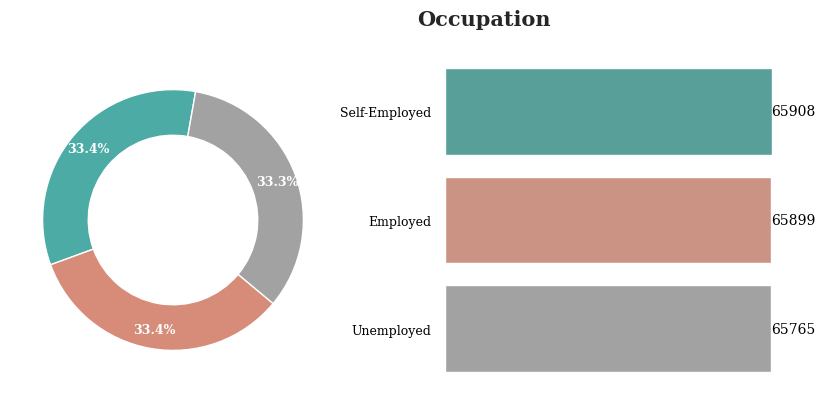

In [20]:
showplot("Occupation")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


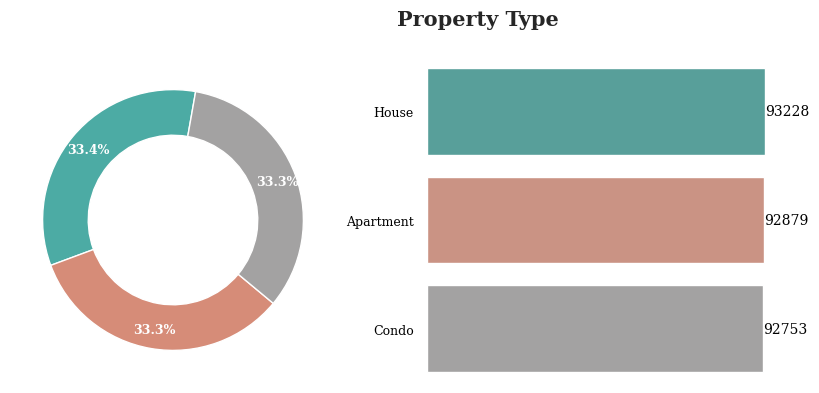

In [21]:
showplot("Property Type")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


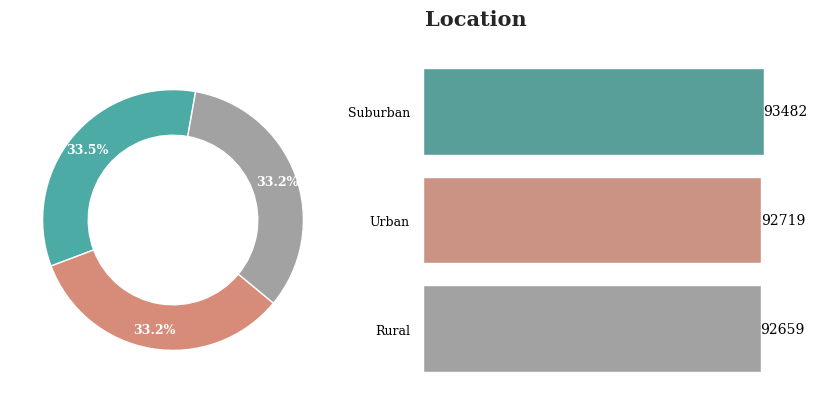

In [22]:
showplot("Location")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


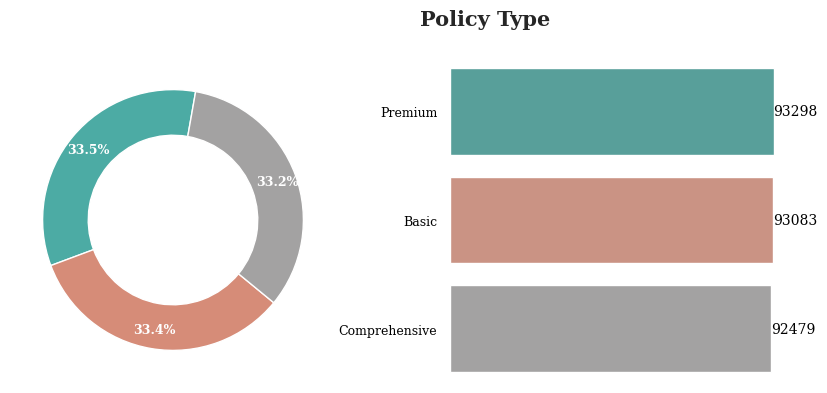

In [23]:
showplot("Policy Type")

In [24]:
# showplot("Policy Start Date")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


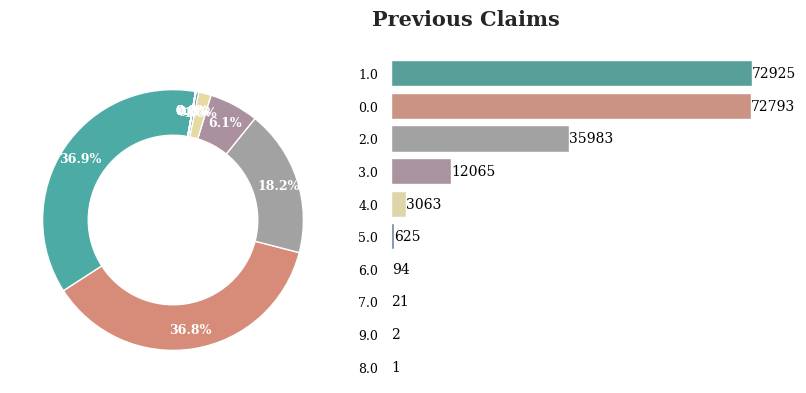

In [25]:
showplot("Previous Claims")

<Axes: xlabel='Credit Score', ylabel='Density'>

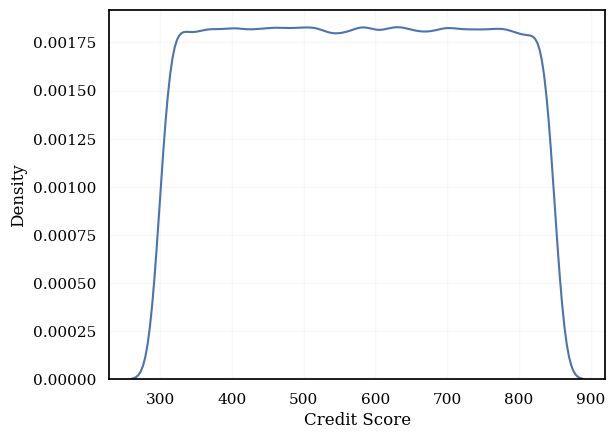

In [42]:
#
sns.kdeplot(data=df, x="Credit Score")

<Axes: xlabel='Count', ylabel='Credit Score'>

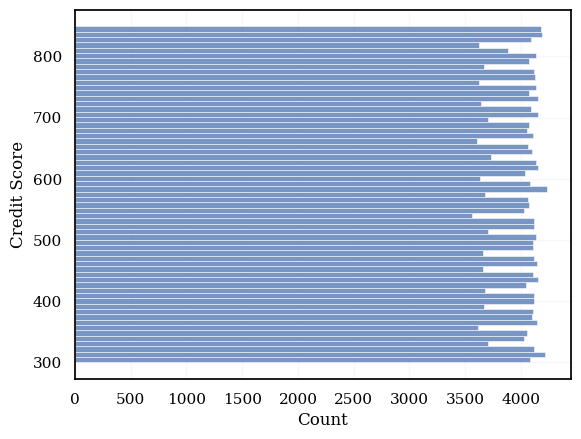

In [45]:
#
sns.histplot(data=df, y="Credit Score")

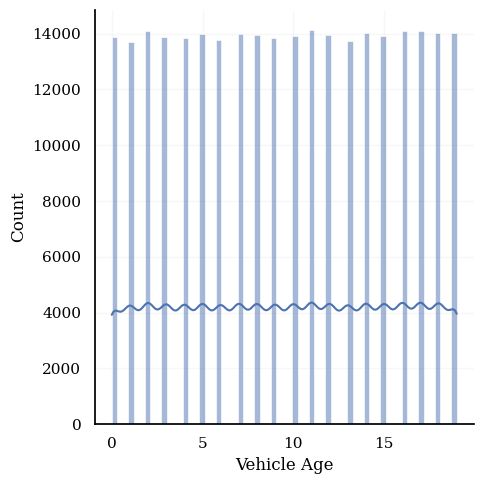

In [46]:
fig
sns.displot(data=df, x="Vehicle Age", kde=True)

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: 
The palette list has fewer values (7) than needed (550) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


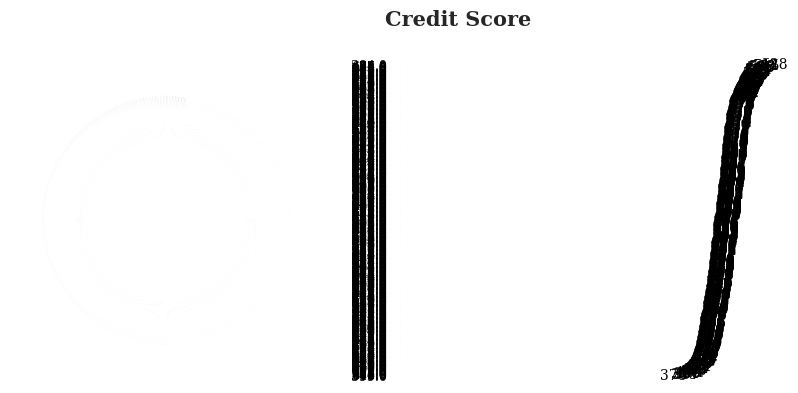

In [26]:
# showplot("Credit Score")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


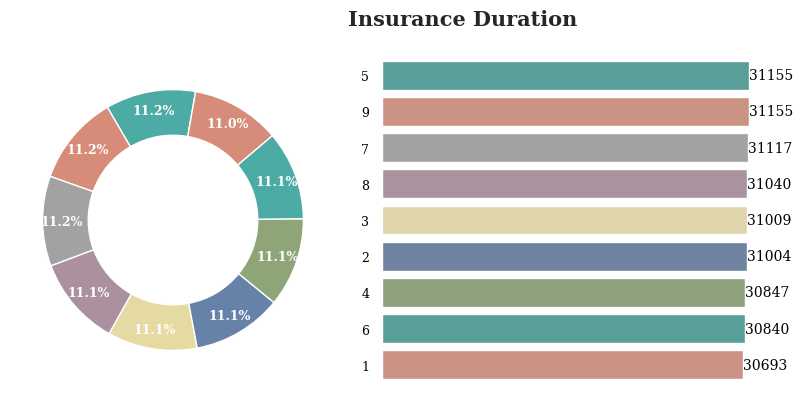

In [27]:
showplot("Insurance Duration")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


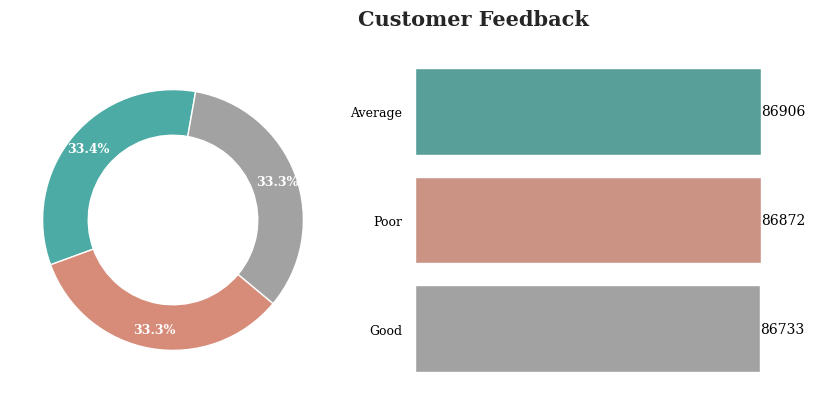

In [28]:
showplot("Customer Feedback")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


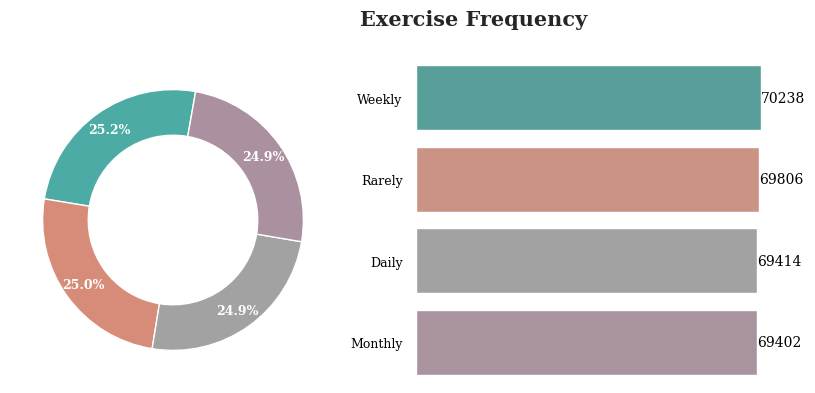

In [29]:
showplot("Exercise Frequency")

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\RC\AppData\Local\Temp\ipykernel_4112\328311695.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)


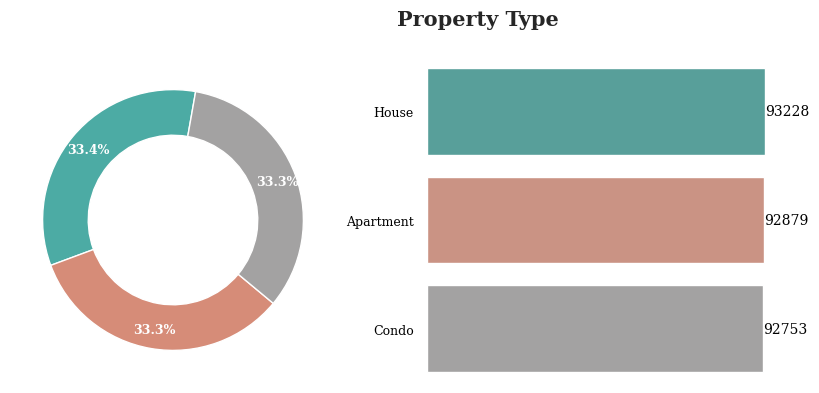

In [30]:
showplot("Property Type")

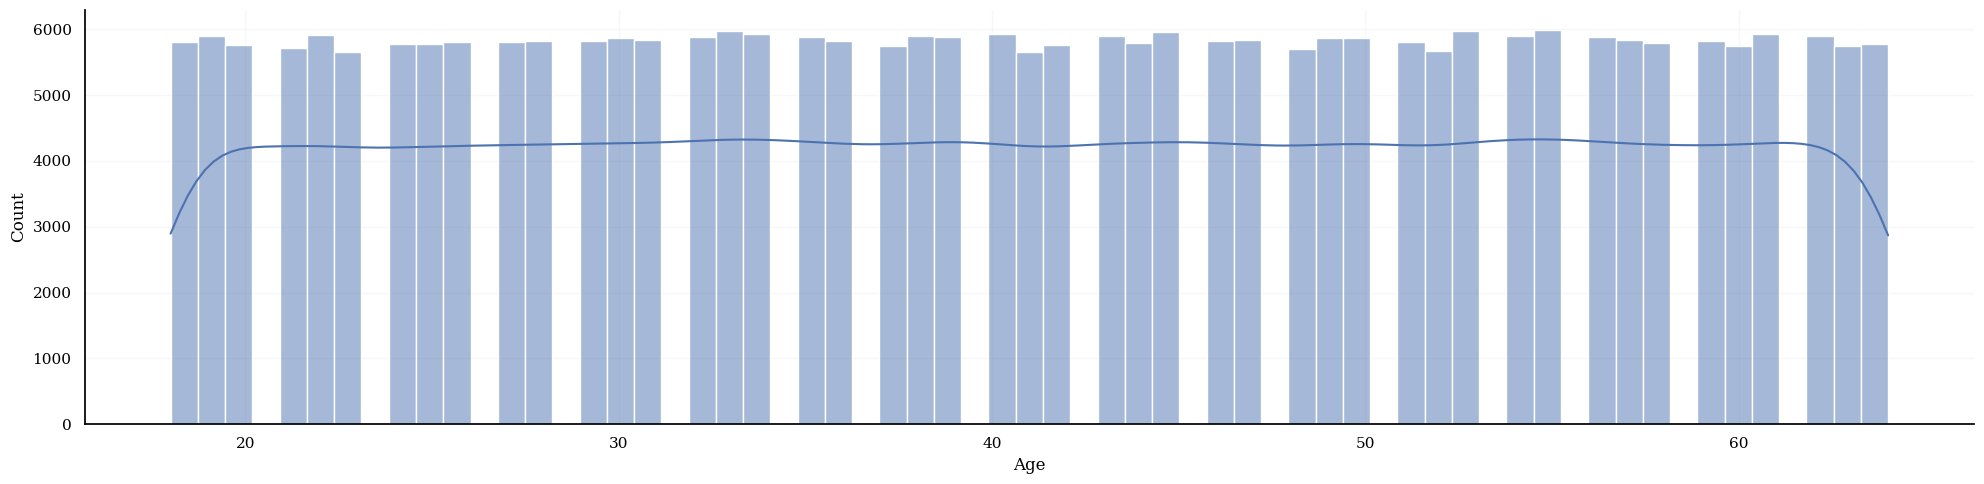

In [55]:
sns.displot(data=df, x="Age", kde=True, height=5, aspect=20/5)  
plt.show()


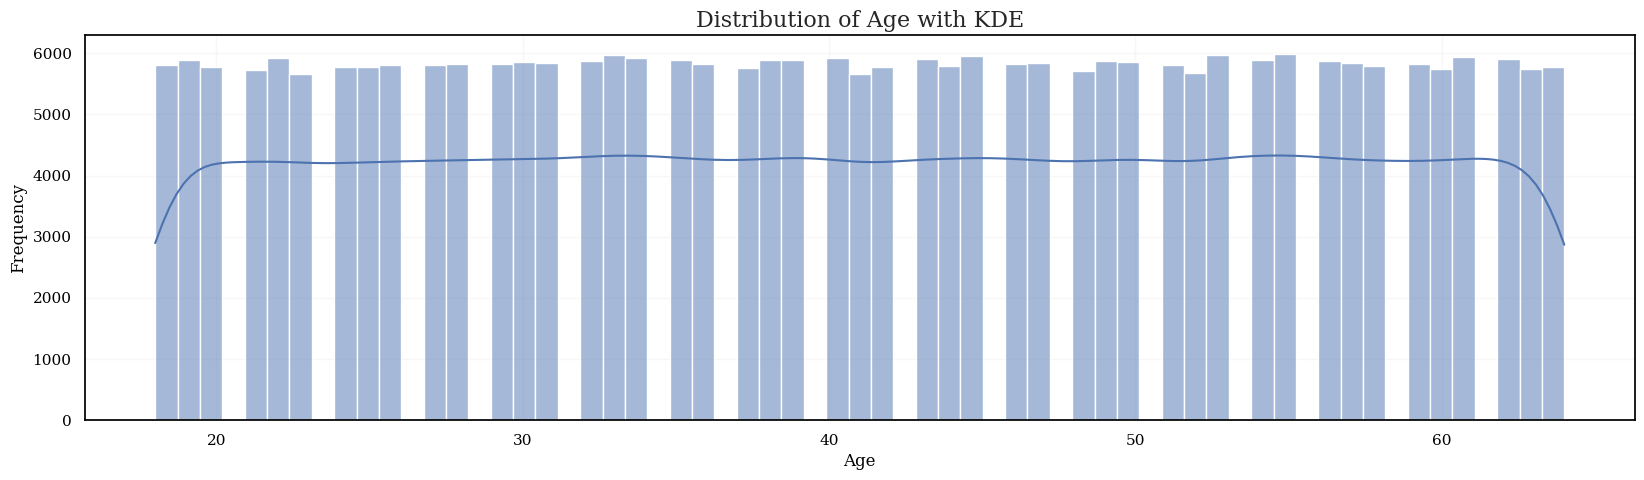

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure avec une taille personnalisée
fig, ax = plt.subplots(figsize=(20, 5))

# Utilisation de sns.histplot pour tracer Age avec KDE
sns.histplot(data=df, x="Age", kde=True, ax=ax)

# Titre et étiquettes
ax.set_title("Distribution of Age with KDE", fontsize=16)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Afficher le graphique
plt.show()


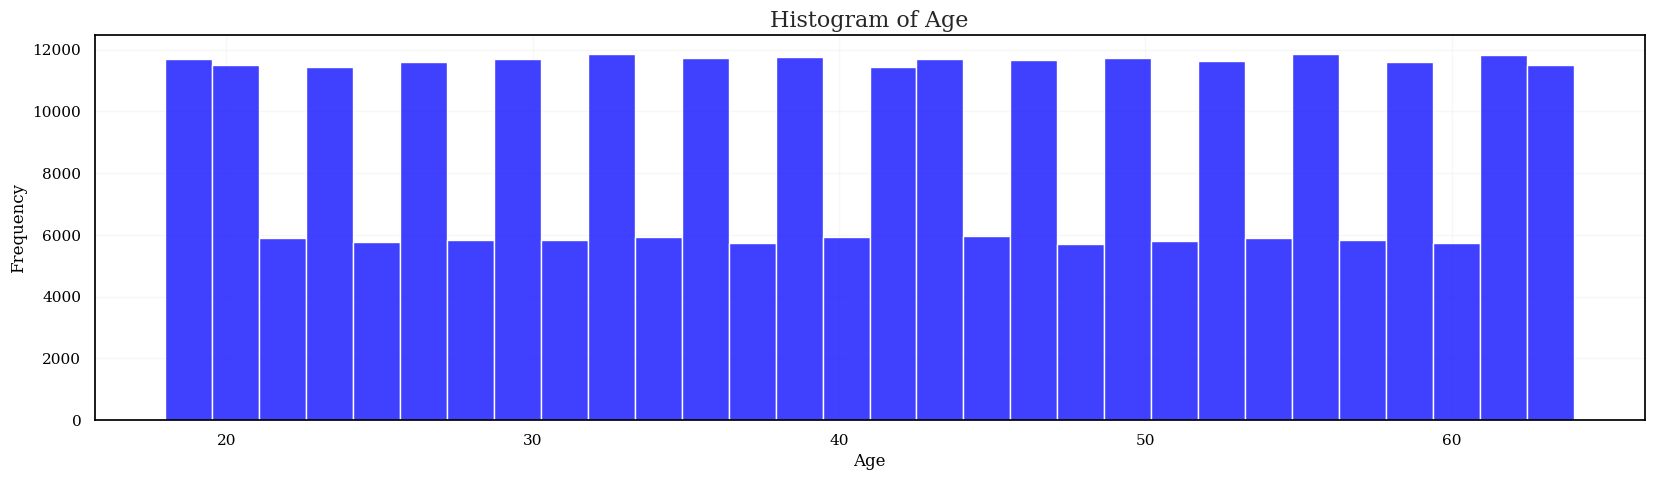

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(20, 5))

# Histogramme avec KDE
sns.histplot(data=df, x="Age", kde=False, bins=30, color='blue')

# Titre et étiquettes
plt.title("Histogram of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Afficher le graphique
plt.show()


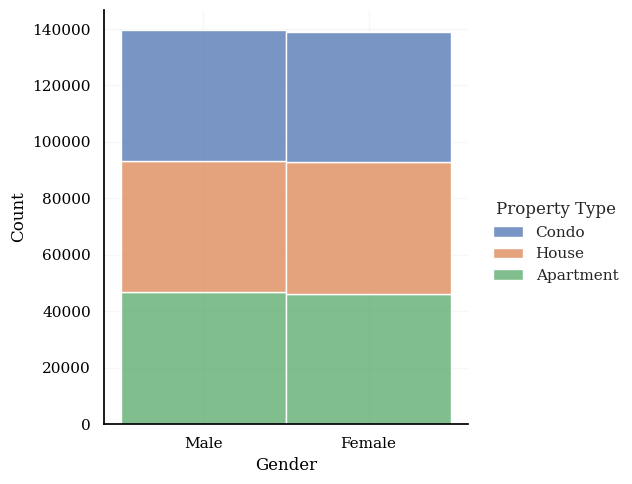

In [49]:
sns.displot(data=df, x="Gender", hue="Property Type", multiple="stack")

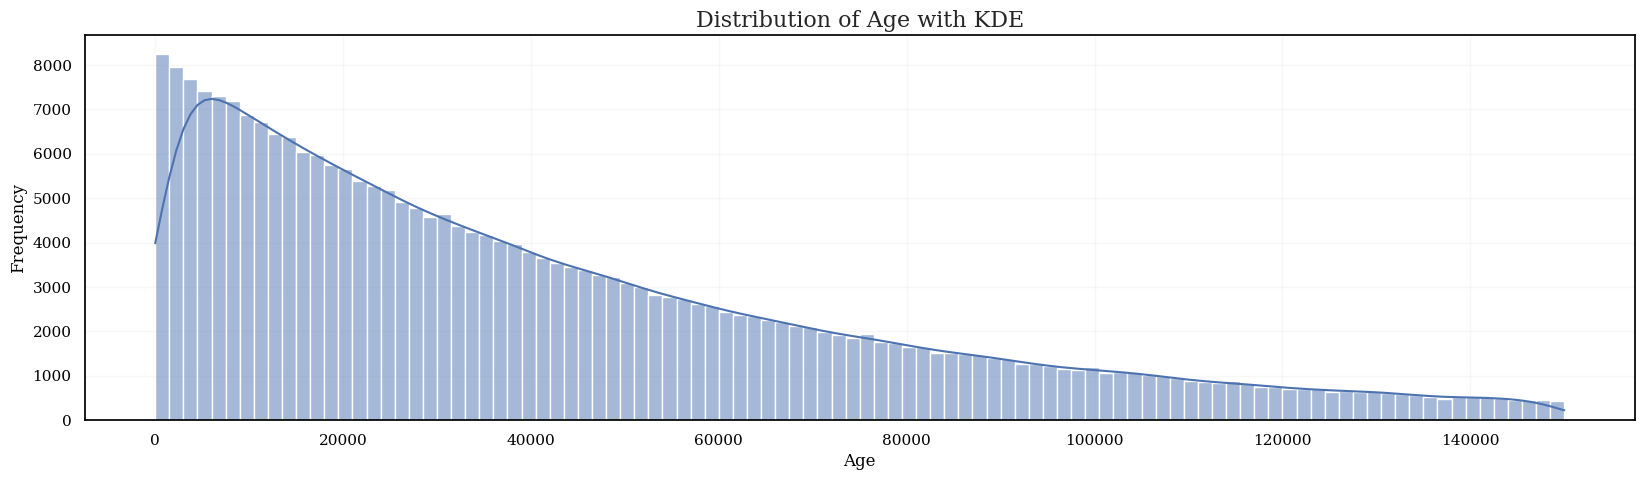

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure avec une taille personnalisée
fig, ax = plt.subplots(figsize=(20, 5))

# Utilisation de sns.histplot pour tracer Age avec KDE
sns.histplot(data=df, x="Annual Income", kde=True, ax=ax)

# Titre et étiquettes
ax.set_title("Distribution of Annual Income with KDE", fontsize=16)
ax.set_xlabel("Annual Income", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Afficher le graphique
plt.show()


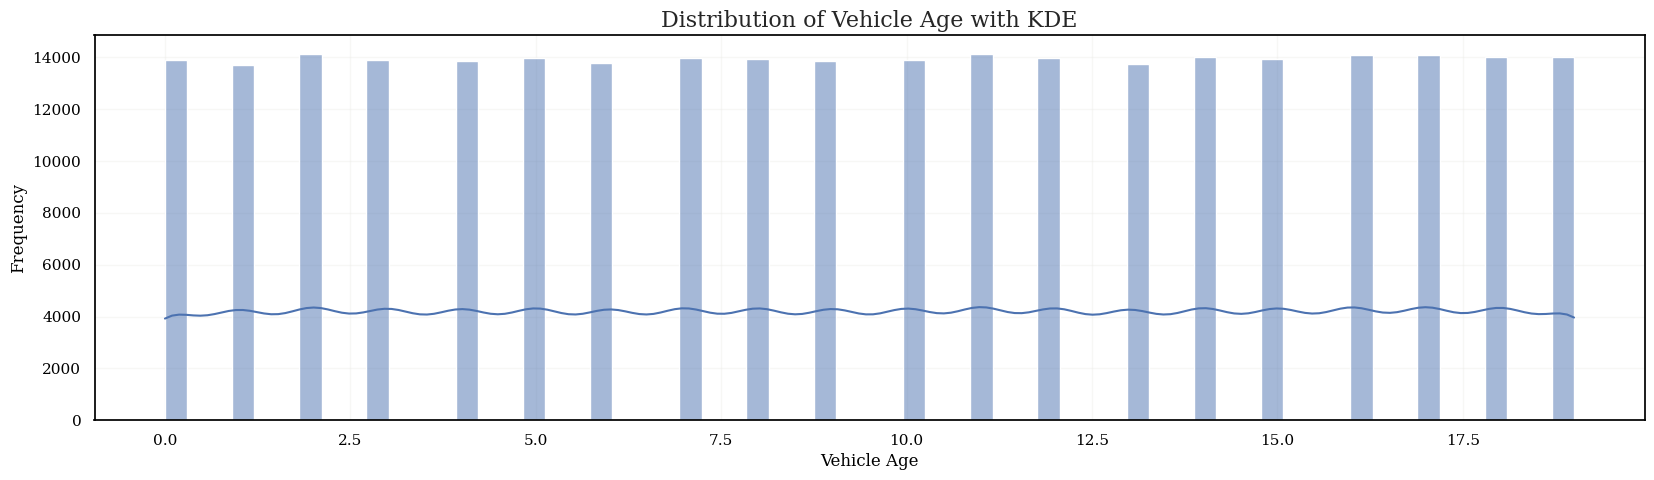

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure avec une taille personnalisée
fig, ax = plt.subplots(figsize=(20, 5))

# Utilisation de sns.histplot pour tracer Age avec KDE
sns.histplot(data=df, x="Vehicle Age", kde=True, ax=ax)

# Titre et étiquettes
ax.set_title("Distribution of Vehicle Age with KDE", fontsize=16)
ax.set_xlabel("Vehicle Age", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Afficher le graphique
plt.show()


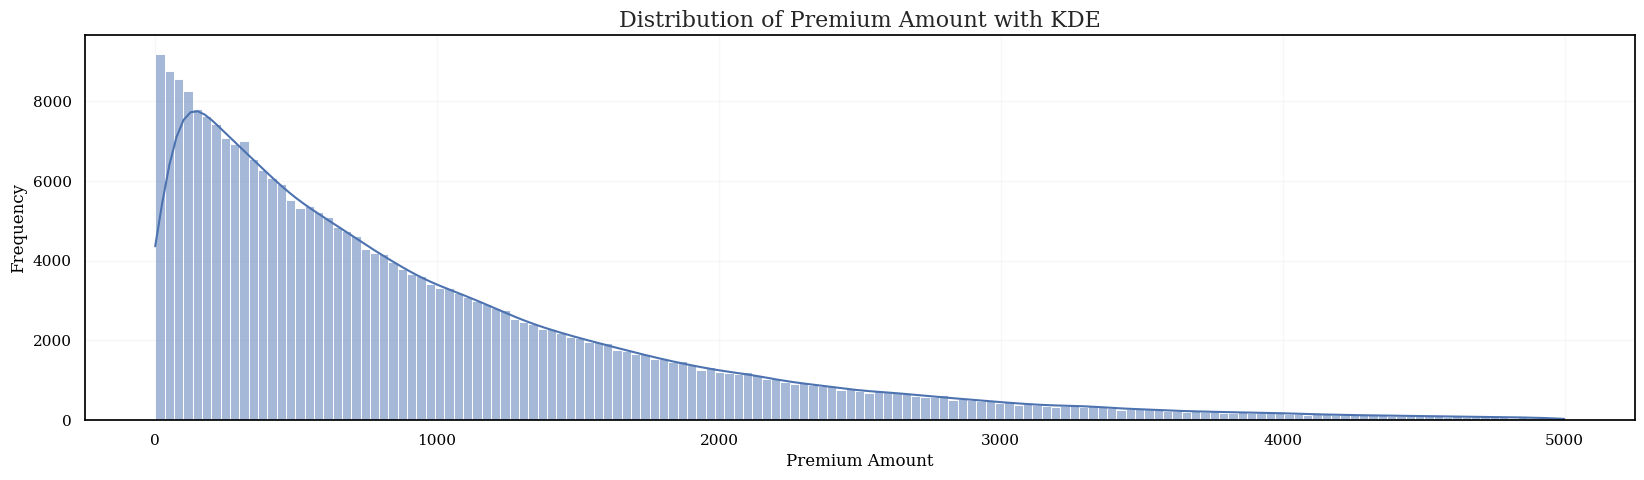

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure avec une taille personnalisée
fig, ax = plt.subplots(figsize=(20, 5))

# Utilisation de sns.histplot pour tracer Age avec KDE
sns.histplot(data=df, x="Premium Amount", kde=True, ax=ax)

# Titre et étiquettes
ax.set_title("Distribution of Premium Amount with KDE", fontsize=16)
ax.set_xlabel("Premium Amount", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Afficher le graphique
plt.show()


In [31]:
# Cat_col_new=['Gender','Marital Status']

# #all cat col apply in my showplot functin

# showplot(Cat_col_new)

<div style="border-radius:10px; padding: 12px; background-color:black; font-size:140%; text-align:left">
✩ <b>91.4%</b> people <b>Frequently consume high caloric food</b>
        

In [87]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='Martial Status', data=df, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

C:\Users\RC\AppData\Local\Temp\ipykernel_4112\720451278.py:2: UserWarning: 
The palette list has fewer values (7) than needed (101693) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='Gender', hue='Annual Income', data=df, palette=colors, dodge=True)


KeyboardInterrupt: 

In [32]:
df.columns


Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Premium Amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [33]:
# #Change the Number of Dependents col data type to int
# #First we 
# df['Number of Dependents']=df['Number of Dependents'].astype(int)


In [34]:
# df['Number of Dependents'].head()



In [35]:
print(Cat_Col)
print(Num_col)


['Gender', 'Marital Status', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Previous Claims', 'Property Type', 'Policy Start Date']
['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Credit Score', 'Insurance Duration', 'Vehicle Age', 'Premium Amount']
